# Friendship paradox


In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

rng = np.random.default_rng()

## Data

In [2]:
# Import edge list `moreno_highschool.edg` into a networkx graph
# Select data directory
import os
if os.path.isdir('/coursedata'):
    course_data_dir = '/coursedata'
elif os.path.isdir('../data'):
    course_data_dir = '../data'
else:
    # Specify course_data_dir on your machine
    course_data_dir = "."
    # YOUR CODE HERE
    #raise NotImplementedError()

print('The data directory is %s' % course_data_dir)

highschool_fname = 'moreno_highschool.edg'
highschool_fname = os.path.join(course_data_dir, 'moreno_highschool.edg')
highschool_net = nx.read_edgelist(highschool_fname, nodetype=int)

The data directory is /coursedata


### a. Fraction of nodes with lower degree than their neighbours
Let us first consider a small network whose edge list is given in `moreno_highschool.edg`. The network represents the friendships between students in a small high school in Illinois, US, in 1957-1958.

Visualize the network to get a grasp of its structure. Then calculate the fraction of nodes in the network that have a higher average neighbor degree than their own degree.

In [9]:
def get_average_neighbor_degree(G):
    '''
    Calculate the average degree of neighbors for each node in G.

    Args:
        G (nx.Graph): a networkx graph

    Returns:
        avg_neighbor_degree (dict): a dictionary with nodes as keys and
            the average degrees of their neighbors as values

    Examples:
        >>> G = nx.Graph()
        >>> G.add_edges_from([(1, 2), (1, 3), (2, 3), (3, 4), (3, 5), (4, 5), (4, 6)])
        >>> avg_neighbor_degree = get_average_neighbor_degree(G)
        >>> print(avg_neighbor_degree)
        {1: 3.0, 2: 3.0, 3: 2.25, 4: 2.3333333333333335, 5: 3.5, 6: 3.0}
    '''
    avg_neighbor_degree = {}
    # TODO: For each node in G, calculate the average degree of its neighbors
    # YOUR CODE HERE
    for node in G.nodes:
        avg_neighbor_degree[node] = np.mean([G.degree[neighbor] for neighbor in G.neighbors(node)])
    return avg_neighbor_degree

In [10]:
# Sort the nodes by their degree and relabel them
sorted_nodes = sorted(highschool_net.nodes(), key=lambda x: highschool_net.degree(x), reverse=True)
mapping = {original_label: new_label for new_label, original_label in enumerate(sorted_nodes)}
highschool_net = nx.relabel_nodes(highschool_net, mapping)

First, let's visualize the network to get a rough idea of its structure. Here, the node color corresponds to the node degree.

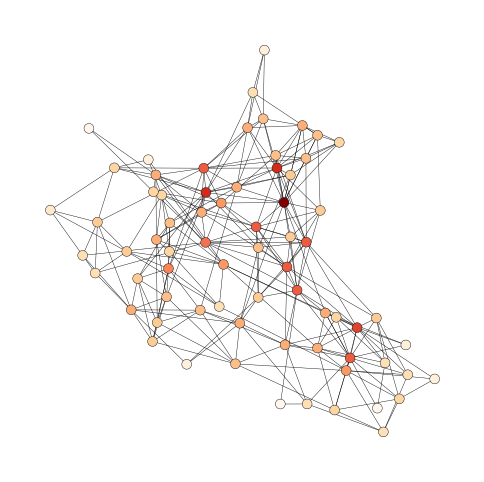

In [11]:
degrees = [highschool_net.degree[node] for node in highschool_net]
fig_vis, ax_vis = plt.subplots(figsize=(6, 6))
nx.draw(highschool_net, ax=ax_vis, node_size=50, linewidths=0.3, 
        node_color=degrees, cmap='OrRd', vmin=min(degrees), vmax=max(degrees), 
        width=0.3, edgecolors='black')

In [12]:
# Save the figure to current directory
figure_filename = 'highschool_network_visualized.pdf'
fig_vis.savefig(figure_filename)

In [13]:
def get_fraction_friendship_paradox(network):
    '''
    Calculate the fraction of nodes in the network that have a higher average
    neighbor degree than their own degree.

    Args:
        network (nx.Graph): a networkx graph

    Returns:
        fraction (float): the fraction of nodes in the network that have a higher
            average neighbor degree than their own degree

    Examples:
        >>> G = nx.Graph()
        >>> G.add_edges_from([(1, 2), (1, 3), (2, 3), (3, 4), (3, 5), (4, 5), (4, 6)])
        >>> fraction = get_fraction_friendship_paradox(G)
        >>> print(fraction)
        0.6666666666666666
    '''
    # TODO: Calculate the fraction of nodes whose average neighbor degree is 
    # higher than their own degree
    fraction = None #Replace!
    # YOUR CODE HERE
    avg_neighbor_degree = get_average_neighbor_degree(network)
    fraction = len([node for node in network.nodes if avg_neighbor_degree[node] > network.degree[node]]) / len(network.nodes)
    return fraction

In [14]:
print('Fraction of nodes with average neighbor degree higher than their own degree: ', 
      get_fraction_friendship_paradox(highschool_net))

Fraction of nodes with average neighbor degree higher than their own degree:  0.7142857142857143


### b Scatterplot of degrees
Next, let's produce a scatterplot, where each datapoint = (a node's degree,its neighbours' average degree). Let's also plot a straight line, where the average neighbour degree equals the node degree. 

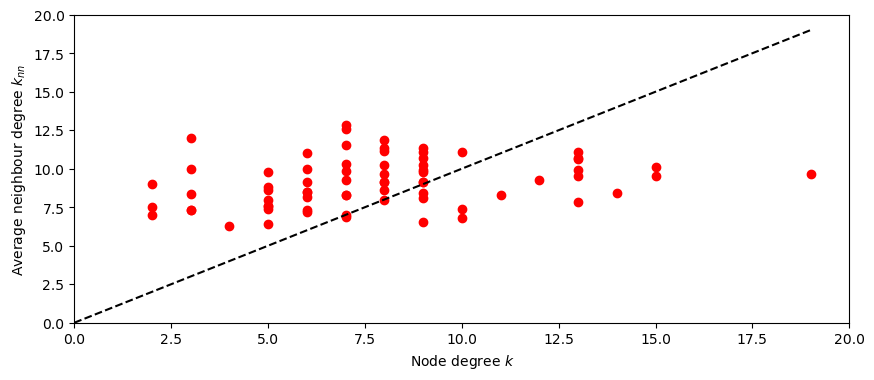

In [15]:
# node_degrees is a dictionary with nodes as keys and their degrees as values
nodes = sorted(highschool_net.nodes())
node_degrees = [highschool_net.degree(node) for node in nodes]

# avg_nbr_degrees is a dictionary with nodes as keys and their average neighbor degrees as values
avg_nbr_degrees_dict = get_average_neighbor_degree(highschool_net)
avg_nbr_degrees = [avg_nbr_degrees_dict[node] for node in nodes]

fig_scat,ax_scat=plt.subplots(figsize=(10,4))

ax_scat.plot(node_degrees,avg_nbr_degrees,'ro')
ax_scat.plot(range(0,20),range(0,20),'k--')
ax_scat.set_xlim(0,20)
ax_scat.set_ylim(0,20)

ax_scat.set_xlabel('Node degree $k$')
ax_scat.set_ylabel('Average neighbour degree $k_{nn}$');


In [16]:
# Save the figure to current directory
figure_filename = 'friendship_paradox_highschool.pdf'
fig_scat.savefig(figure_filename)

### c. Friendship paradox in large model networks. 
Now let us check the friendship paradox for larger model networks. For that, we consider an Erdős-Rényi random graph and a Barabási-Albert scale-free network. For each of these network models, generate a network with $N=10000$ nodes. For each network, calculate the fraction of nodes in the network that have a higher average neighbor degree than their own degree, using the function you developed for question a). 


In [19]:
N = 10000
p = 0.001
ERG = nx.fast_gnp_random_graph(N, p, seed=rng)
print('Fraction of nodes with average neighbor degree higher than their own degree: ',
      get_fraction_friendship_paradox(ERG))

Fraction of nodes with average neighbor degree higher than their own degree:  0.6223


In [21]:
N = 10000
m = 2
BAG = nx.barabasi_albert_graph(N, m, seed=rng)
print('Fraction of nodes with average neighbor degree higher than their own degree: ',
      get_fraction_friendship_paradox(BAG))

Fraction of nodes with average neighbor degree higher than their own degree:  0.8865
